Hunter Bennett | Glass Lab | Kupffer Strains Project | February 03 2021  
This is a re-vamp of the differential peak calling pipeline for comparisons within strains in a given condition (healthy, CCl4, NASH). This pipeline takes in ATAC-seq peaks annotated with H3K27Ac ChIP-seq data (or other histone modified data) from three strains (c57, balb, and aj) and compares each strain to the other pairwise. The main outputs of this file are:
1. A homer differential peak file containing each pairwise comparison.
2. Scatterplots of each pairwise comparison with significant peaks highlighted.
3. Heatmaps of differential peaks across all comparisons to highlight patterns.
4. Peak files for GREAT analysis of functional annotations associated with genomic regions.

In [2]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano
from homer_preprocessing import read_annotated_peaks, import_homer_diffpeak, pull_comparisons_get_diff

In [3]:
dataDirectory = ''
workingDirectory = '/home/h1bennet/strains/results/00_Strains_Control_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

### Import differential peaks

In [20]:
diff_peak_h3k27ac, peaks_h3k27ac, peak_mat_h3k27ac, peak_mat_quant_h3k27ac = import_homer_diffpeak(
    './merged_peaks/diff_output.txt',
    './merged_peaks/ann_norm_kc_control_atac_peaks_all.txt')

annotatePeaks all peaks (64770, 24)
getDiffExpression selected transcripts (63491, 33)
annotatePeaks selected peaks (63491, 24)


In [22]:
diff_peak_atac, peaks_atac, peak_mat_atac, peak_mat_quant_atac = import_homer_diffpeak(
    '../00_Strains_Control_ATAC/merged_peaks/diff_output.txt',
    '../00_Strains_Control_ATAC/merged_peaks/ann_norm_idr_peaks_merged.txt')

annotatePeaks all peaks (64770, 26)
getDiffExpression selected transcripts (63491, 35)
annotatePeaks selected peaks (63491, 26)


In [23]:
diff_peak_merge = pd.merge(diff_peak_atac,
                           diff_peak_h3k27ac,
                           left_index=True,
                           right_index=True,
                           suffixes=('_atac', '_h3k27ac'),
                           how='inner')

In [26]:
print(diff_peak_h3k27ac.shape[0])
print(diff_peak_atac.shape[0])
print(diff_peak_merge.shape[0])

63491
63491
63491


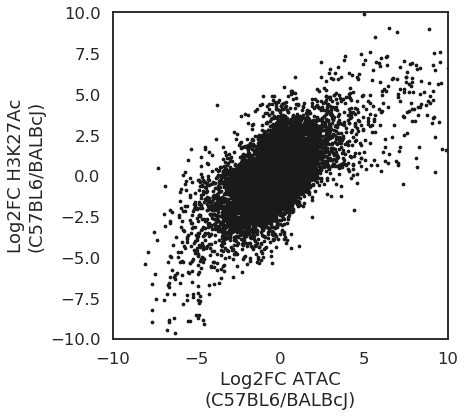

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(
    diff_peak_merge['00_c57 vs. 01_balbc Log2 Fold Change_atac'],
    diff_peak_merge['00_c57 vs. 01_balbc Log2 Fold Change_h3k27ac'],
    s=5,
    c='k')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_xlabel('Log2FC ATAC\n(C57BL6/BALBcJ)');
ax.set_ylabel('Log2FC H3K27Ac\n(C57BL6/BALBcJ)');